In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import copy

from tic_env import TictactoeEnv, OptimalPlayer

# Tic Toc Toe environment

Our 1st game is the famous Tic Toc Toe. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Tic-tac-toe

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "tic_env.py". Here, we give a brief introduction to the environment and how it can be used.

### Initialization and attributes

You can initialize the environment / game as following:

In [2]:
env = TictactoeEnv()

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'grid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 0,
 'current_player': 'X'}

The game is played by two players: player 'X' and player 'O'. The attribute 'current_player' shows whose turn it is. We assume that player 'X' always plays first.

The attribute 'grid' is a 3x3 numpy array and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each elements can take a value in {0, 1, -1}:
     0 : place unmarked
     1 : place marked with X 
    -1 : place marked with O 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game: either "X", "O", or None.  

You can use function 'render' to visualize the current position of the board:

In [4]:
env.render()

|- - -|
|- - -|
|- - -|



### Taking actions

The game environment will recieve action from two players in turn and update the grid. At each time, one player can take the action $a_t$, where $a_t$ can either be an integer between 0 to 8 or a touple, corresponding to the 9 possible.

Function 'step' is used to recieve the action of the player, update the grid:

In [5]:
env.step(2)

(array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 False,
 None)

In [6]:
env.render()

|- - X|
|- - -|
|- - -|



In [7]:
env.__dict__

{'grid': array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 1,
 'current_player': 'O'}

In [8]:
env.step((1,1))

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [9]:
env.render()

|- - X|
|- O -|
|- - -|



In [10]:
env.__dict__

{'grid': array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 2,
 'current_player': 'X'}

But not all actions are available at each time: One cannot choose a place which has been taken before. There is an error if an unavailable action is taken:

In [11]:
#env.step((0,2))

### Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game, -1 if you lose, and 0 besides. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [12]:
env.observe()

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [13]:
env.reward(player='X')

0

In [14]:
env.reward(player='O')

0

An example of finishing the game:

In [15]:
env.step(0)
env.step(3)
env.step(1)

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [16]:
env.render()

|X X X|
|O O -|
|- - -|



In [17]:
env.observe()

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [18]:
env.reward(player='X')

1

In [19]:
env.reward(player='O')

-1

# Optimal policy for Tic Toc Toe environment

Fortunately, we know the exact optimal policy for Tic Toc Toe. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [20]:
env.reset();

In [21]:
opt_player = OptimalPlayer(epsilon = 0., player = 'X')

In [22]:
opt_player.act(env.grid)

(0, 2)

In [23]:
opt_player.player

'X'

### An example of optimal player playing against random player

In [24]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)] #randomly assigning who plays first
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = player_rnd.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  Turns[0])
            print('Random player = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|O - X|
|- X X|
|O O X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X - X|
|O X -|
|X O O|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X O X|
|X O O|
|X X O|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|O X X|
|- O X|
|- - O|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|X - O|
|X O X|
|O - -|



### An example of optimal player playing against optimal player

In [25]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt_1.act(grid)
        else:
            move = player_opt_2.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Optimal player 2 = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X O X|
|O O X|
|X X O|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X X O|
|O O X|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X O X|
|O O X|
|X X O|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|O X X|
|X O O|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|X O X|
|X X O|
|O X O|



## Implementation of Qlearning

In [83]:
from collections import defaultdict
from random import randint
from random import random
    
def valid_move(grid, move):
    return grid[move] == 0

def agrmax(array):
    i_max = 0
    for i, elem in enumerate(array):
        if elem>array[i_max]:
            i_max = i
    return i_max

def grid_repr(grid):
    between_0_2 = grid.reshape((9))+1
    power_of_3 = 3**np.arange(9)
    return (between_0_2*power_of_3).sum()


class QLearning():
    
    def __init__(self, alpha=0.05, gamma=0.99, epsilon=0.1):
        self.q_values = defaultdict(lambda : 0)
        self.last_grid = None
        self.last_action = None

        self.alpha=alpha
        self.gamma=gamma
        self.epsilon=epsilon
    
        
       
        
    def act(self, grid):
        move = self._act_random(grid) if random()<self.epsilon else self._act_optimal(grid)
        self._update_qvalue(grid, move)
        
       
        return move
    
    
    def _act_optimal(self, grid):
        actions = [(x,y) for x in range(3) for y in range(3) if valid_move(grid, (x,y))]
        actions_values = list([self.q_value(grid, a) for a in actions])
        
        move = actions[agrmax(actions_values)]
        return move
        
        
    def _act_random(self, grid):
        actions = [(x,y) for x in range(3) for y in range(3) if valid_move(grid, (x,y))]
        move = actions[randint(0,len(actions)-1)]
        return move
    
    def q_value(self, grid, move):
        return self.q_values[(grid_repr(grid),move)]
    def change_qvalue(self, grid, move, value):
        self.q_values[(grid_repr(grid),move)] = value
    
    
    def update_qvalue_end(self, reward=0):
        if self.last_grid is not None and self.last_action is not None:
            state_action = (self.last_grid,self.last_action)
            estimated_q = self.q_value(*state_action)
            delta_q = reward  - estimated_q
            self.change_qvalue(*state_action, estimated_q+self.alpha*delta_q)
          
        
     
        self.last_grid = None
        self.last_action = None
          
    
    def _update_qvalue(self,grid, move, reward=0):
        if self.last_grid is not None and self.last_action is not None:
            action = self._act_optimal(grid)
            state_action = (self.last_grid,self.last_action)
            estimated_q = self.q_value(*state_action)
            delta_q = reward + self.gamma*self.q_value(grid,action) - estimated_q
            self.change_qvalue(*state_action, estimated_q+self.alpha*delta_q)
        
            
        self.last_grid = grid
        self.last_action = move
        
    def update_epsilon(self, new_epsilon):
        self.epsilon = new_epsilon

### Checking if the algorithm works 

In [27]:
q_player = QLearning()
### to play call :: q_player.act(grid)
### at the end call :: q_player.update_qvalue_end(reward=env.reward(player=Turns[1]))

In [28]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = q_player.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Q player = ' +  Turns[1])
            q_player.update_qvalue_end(reward=env.reward(player=Turns[1]))
    
            env.reset()
            break

-------------------------------------------
Game end, winner is player O
Optimal player 1 = O
Q player = X
-------------------------------------------
Game end, winner is player O
Optimal player 1 = O
Q player = X
-------------------------------------------
Game end, winner is player X
Optimal player 1 = X
Q player = O
-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Q player = X
-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Q player = X


___

## Part 2.1

### Question 1. 

Plot average reward for every 250 games during training – i.e. after the 50th game, plot the average reward of the first 250 games, after the 100th game, plot the average reward of games 51 to 100, etc. Does the agent learn to play Tic Tac Toe?

In [82]:
env = TictactoeEnv()
Turns = np.array(['X','O'])
q_player = QLearning()
avg_rewards = [] #list that stores the avg reward for each 250 games
s = 0

for i in range(20000):
    grid, _, __ = env.observe()
    player_opt = OptimalPlayer(epsilon=0.5, player=Turns[np.mod(i,2)]) #switching first player per game
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = q_player.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            if np.mod(i,1000) == 0:
                print('-------------------------------------------')
                print('Game: ' + str(i))
                print('Optimal player = ' +  Turns[np.mod(i,2)])
                print('Q player = ' +  Turns[np.mod(i+1,2)])
                print('Game ended, winner is player ' + str(winner))
            
            
            q_player_reward = env.reward(player=Turns[np.mod(i+1,2)])
            
            # Storing q_player_reward
            s += q_player_reward 
            if np.mod(i+1, 250) == 0:
                avg_rewards.append(s / 250.0)
                s = 0
            q_player.update_qvalue_end(reward=q_player_reward)
            
    
            env.reset()
            break

-------------------------------------------
Game: 0
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 1000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 2000
Optimal player = X
Q player = O
Game ended, winner is player None
-------------------------------------------
Game: 3000
Optimal player = X
Q player = O
Game ended, winner is player X
-------------------------------------------
Game: 4000
Optimal player = X
Q player = O
Game ended, winner is player O
-------------------------------------------
Game: 5000
Optimal player = X
Q player = O
Game ended, winner is player None
-------------------------------------------
Game: 6000
Optimal player = X
Q player = O
Game ended, winner is player None
-------------------------------------------
Game: 7000
Optimal player = X
Q player = O
Game ended, winner is player O
-------------------------------------------
Game: 

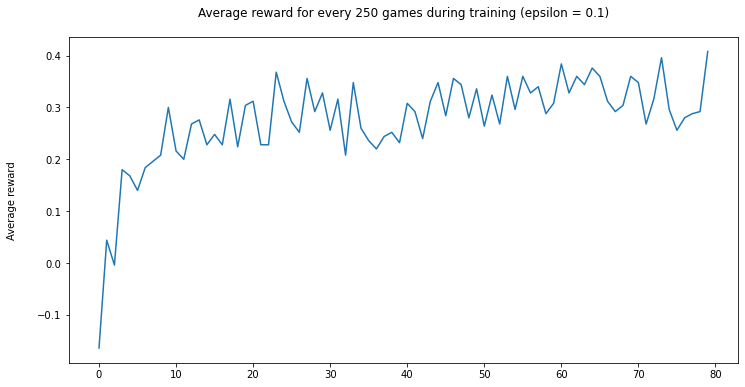

In [30]:
fig = plt.figure(figsize=(12,6))
ax = sns.lineplot(x=range(0, len(avg_rewards)), y = avg_rewards)
ax.set_title('Average reward for every 250 games during training (epsilon = 0.1)', pad = 20)
plt.ylabel('Average reward', labelpad = 20)
plt.show()

### Question 2. 

Plot average reward for every 250 games during training. Does decreasing help training compared to having a fixed ? What is the effect of n*?
Expected answer: A figure showing average reward over time for different values of n*

In [31]:
def epsilon(n, n_star, epsilon_min = 0.1, epsilon_max = 0.8):
    return np.maximum(epsilon_min, epsilon_max*(1-n/n_star))

In [32]:
def compute_M(q_player, epsilon, n_games = 500):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    q_player.update_epsilon(new_epsilon = 0)
    n_wins = 0
    n_loss = 0
    
    for i in range(n_games):
        grid, _, __ = env.observe()
        
        #QPlayer plays first for the first 250 games
        if i < n_games/2 :
            player_opt = OptimalPlayer(epsilon=epsilon, player=Turns[1])
        else :
             player_opt = OptimalPlayer(epsilon=epsilon, player=Turns[0])
        
        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = q_player.act(grid)

            grid, end, winner = env.step(move, print_grid=False)

            if end:
                if i < n_games/2 :
                    if winner == 'X':
                        n_wins += 1
                    else :
                        n_loss += 1
                        
                else:
                    if winner == 'X':
                        n_loss += 1
                    else:
                        n_wins += 1
                        
                env.reset()
                break
                
    return (n_wins-n_loss)/n_games
        

In [33]:
def play_epsilon_n_strategy(n_star, n_games = 20000, player_opt_epsilon = 0.5, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    q_player = QLearning()
    avg_rewards = [] #list that stores the avg reward for each 'average_length' games
    M_opts = [] #list that stores the M_opt for each 'average length' games
    M_rands = [] #list that stores the M_opt for each 'average length' games
    s = 0
    for i in range(n_games):
        grid, _, __ = env.observe()
        player_opt = OptimalPlayer(epsilon=player_opt_epsilon, player=Turns[np.mod(i,2)]) #switching first player per game
        q_player.update_epsilon(new_epsilon = epsilon(i, n_star))

        for j in range(9):
            if env.current_player == player_opt.player:
                move = player_opt.act(grid)
            else:
                move = q_player.act(grid)

            grid, end, winner = env.step(move, print_grid=False)

            if end:
                    
                q_player_reward = env.reward(player=Turns[np.mod(i+1,2)])

                # Storing q_player_reward
                s += q_player_reward 
                if np.mod(i+1, average_length) == 0:
                    avg_rewards.append(s / average_length)
                    s = 0
                                    
                    #Computing M_Opt
                    M_opts.append(compute_M(q_player, 0.0))
                    
                    #Computing M_rand
                    M_rands.append(compute_M(q_player, 1.0))
                    
                q_player.update_qvalue_end(reward=q_player_reward)


                env.reset()
                break
                
    return np.array(avg_rewards), np.array(M_opts), np.array(M_rands)


In [34]:
n_stars = np.array([1, 50, 200, 750, 4000, 8000, 16000, 32000, 40000])
result = np.array([play_epsilon_n_strategy(n_star) for n_star in n_stars])

In [35]:
avg_rewards = result[:,0,:]
M_opts = result[:, 1, :]
M_rands = result[:, 2, :]

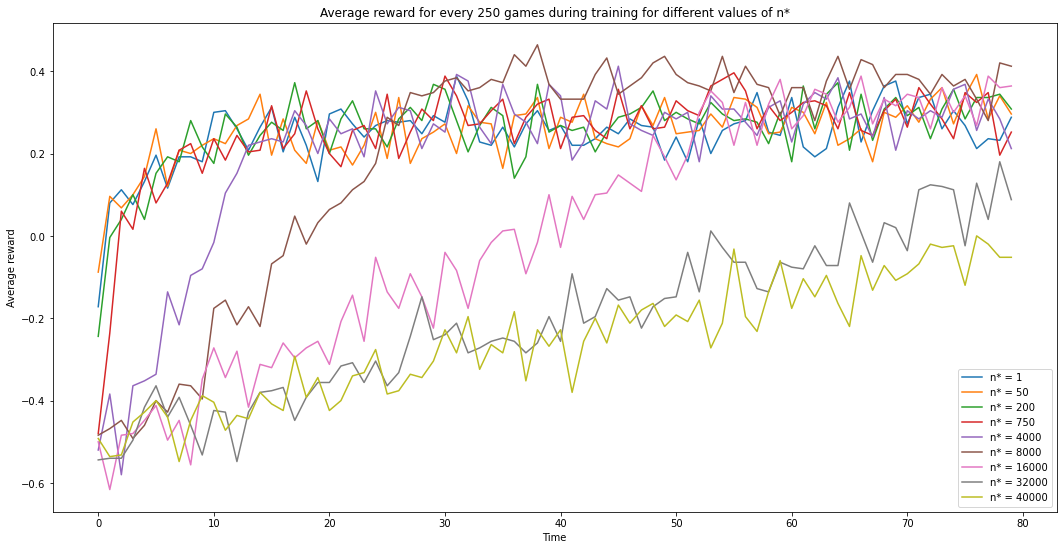

In [36]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = avg_rewards[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('Average reward for every 250 games during training for different values of n*')
plt.ylabel('Average reward')
plt.xlabel('Time')
plt.show()

### Question 3

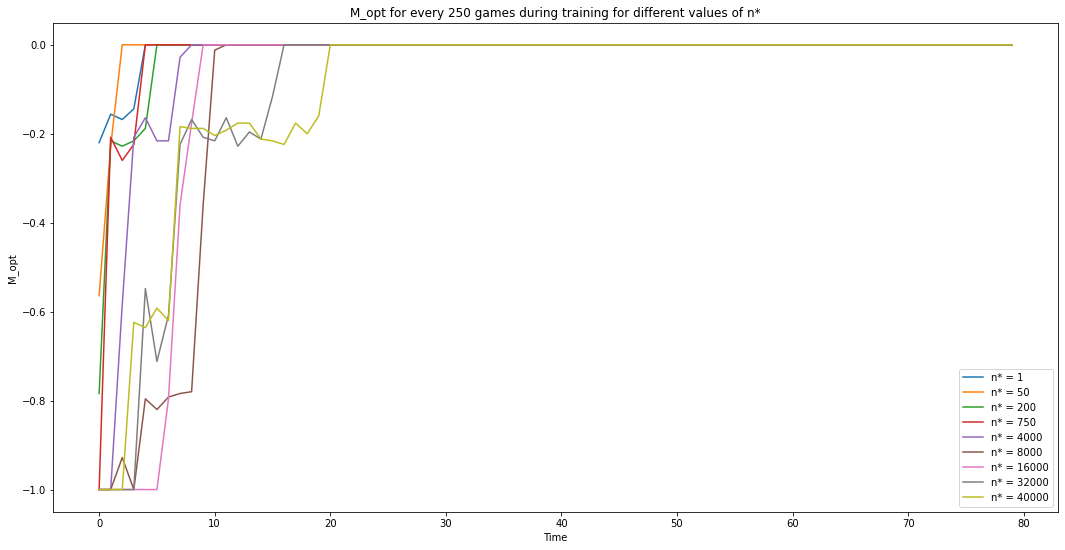

In [37]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of n*')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

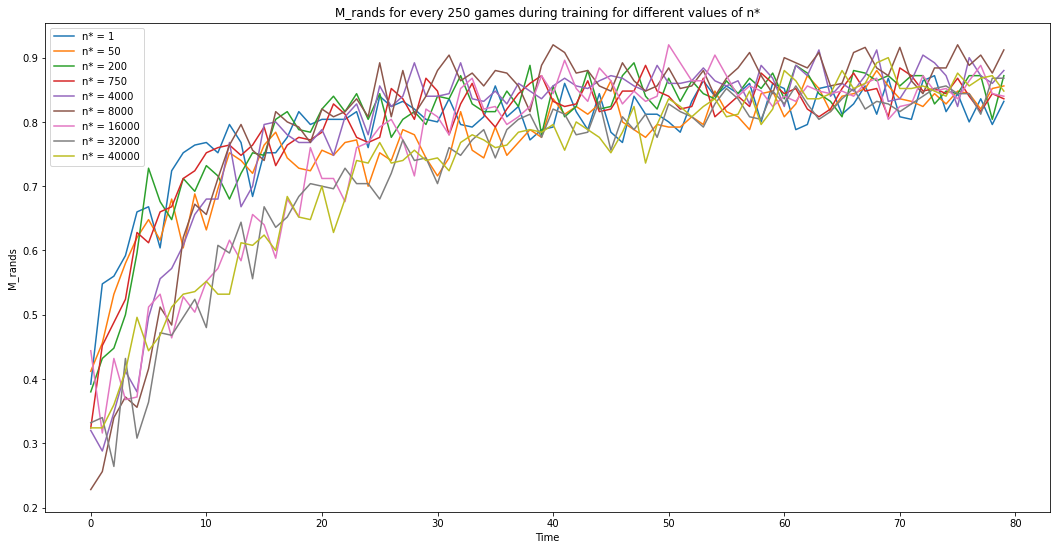

In [38]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_rands for every 250 games during training for different values of n*')
plt.ylabel('M_rands')
plt.xlabel('Time')
plt.show()

### Question 4 & 5

In [42]:
n_star = 8000
e_opts = np.array([0, 0.05, 0.1, 0.25, 0.5, 0.6, 0.75, 0.9, 1])
result = np.array([play_epsilon_n_strategy(n_star, player_opt_epsilon = e_opt) for e_opt in e_opts])
M_opts = result[:, 1, :]
M_rands = result[:, 2, :]

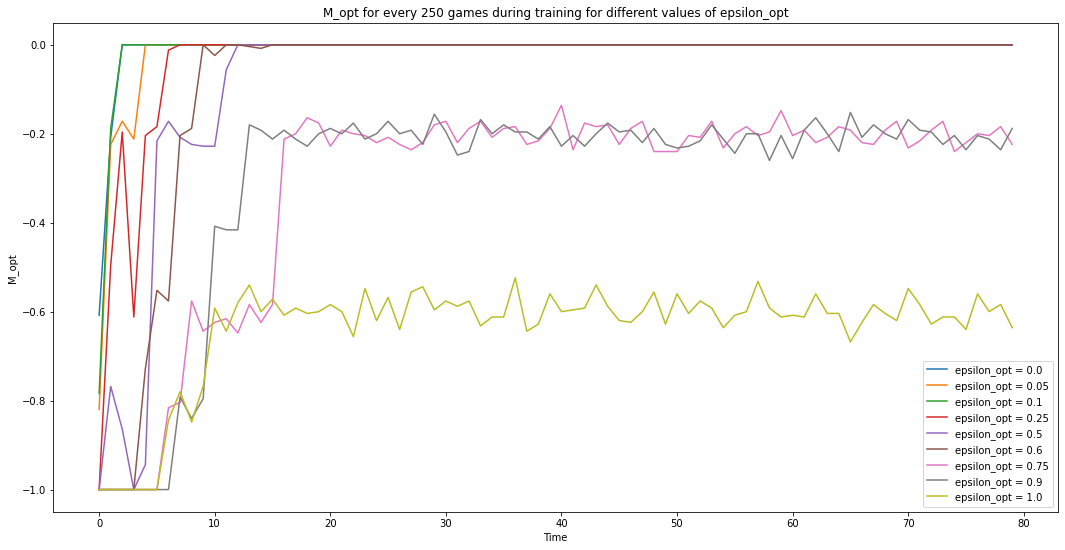

In [43]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'epsilon_opt = ' + str(e_opts[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of epsilon_opt')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

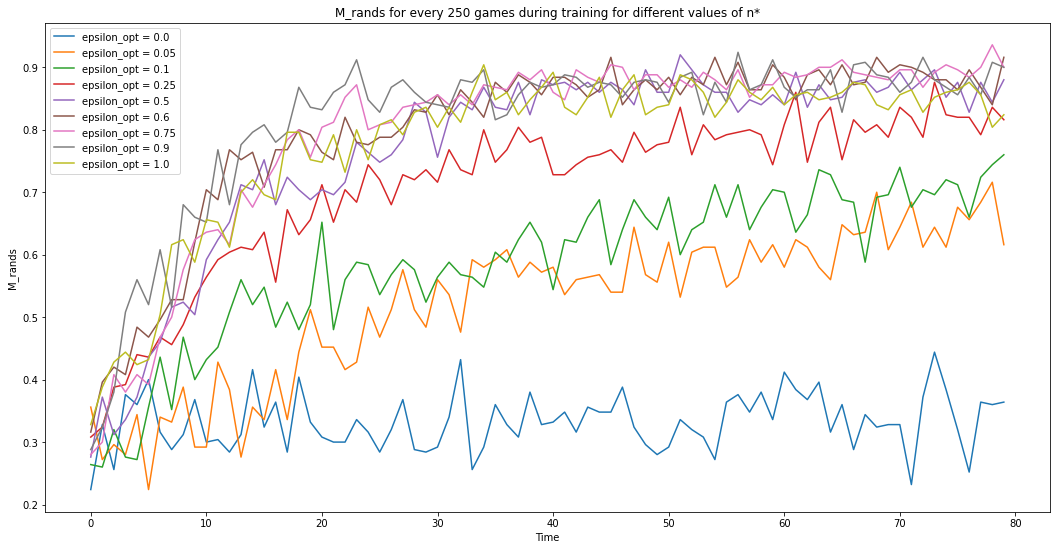

In [44]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'epsilon_opt = ' + str(e_opts[i]))
plt.legend()
plt.title('M_rands for every 250 games during training for different values of n*')
plt.ylabel('M_rands')
plt.xlabel('Time')
plt.show()

___

## Part 2.2

### Question 7

In [88]:
def play_against_self_strategy(epsilon, n_games = 20000, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    q_player = QLearning(epsilon = epsilon)
    M_opts = [] #list that stores the M_opt for each 'average length' games
    M_rands = [] #list that stores the M_opt for each 'average length' games
    
    for i in range(n_games):
        grid, _, __ = env.observe()
        q_copy = copy.deepcopy(q_player)
    
        q_copy_turn = Turns[np.mod(i,2)] #Switching who starts at each iteration between q_copy and q_player
    
        for j in range(9):
            
            if env.current_player == q_copy_turn:
                move = q_copy.act(grid)
            else:
                move = q_player.act(grid)
            
            grid, end, winner = env.step(move, print_grid=False)
 
            
            if end:
                    
                q_player_reward = env.reward(player=Turns[np.mod(i+1,2)])
                
                if np.mod(i+1, average_length) == 0:
                    
                    #Computing M_Opt
                    M_opts.append(compute_M(q_player, 0.0))
                    
                    #Computing M_rand
                    M_rands.append(compute_M(q_player, 1.0))
                    
                q_player.update_qvalue_end(reward=q_player_reward)

                env.reset()
                break
                
    return np.array(M_opts), np.array(M_rands)

In [89]:
epsilons = np.array([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0])
result = np.array([play_against_self_strategy(e) for e in epsilons])

In [90]:
M_opts = result[:, 0, :]
M_rands = result[:, 1, :]

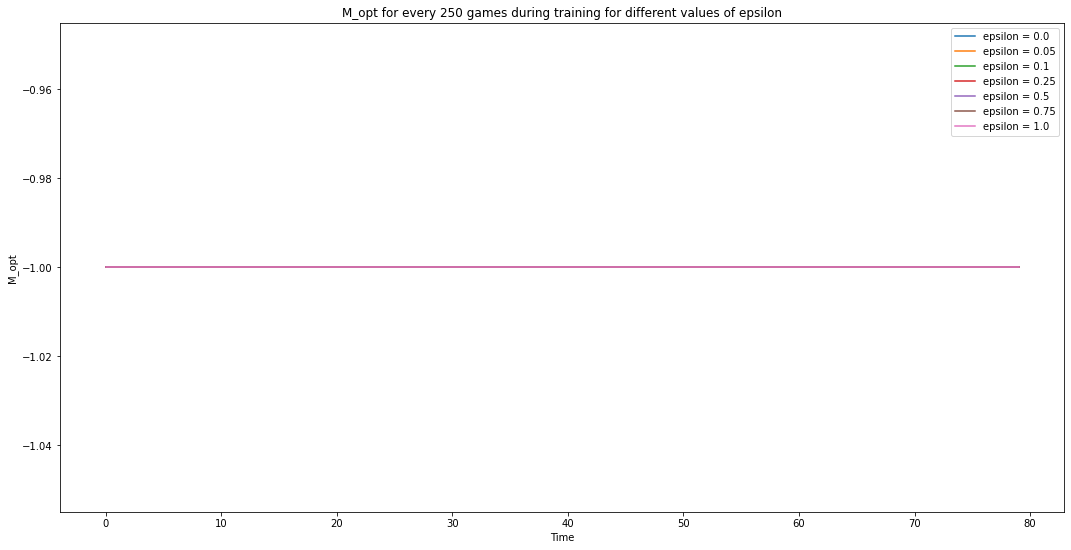

In [91]:
fig = plt.figure(figsize=(18,9))
for i in range(len(epsilons)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'epsilon = ' + str(epsilons[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of epsilon')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

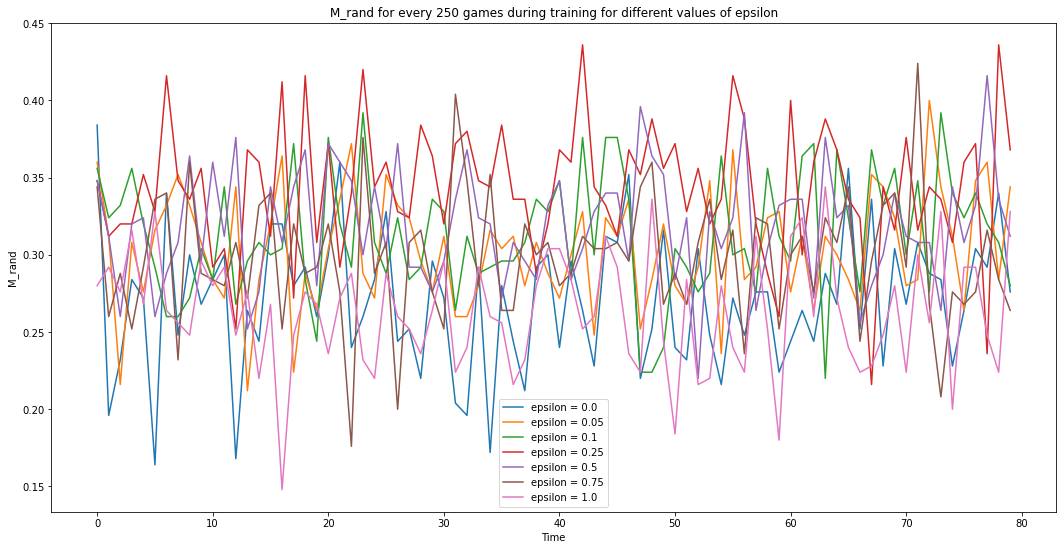

In [92]:
fig = plt.figure(figsize=(18,9))
for i in range(len(epsilons)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'epsilon = ' + str(epsilons[i]))
plt.legend()
plt.title('M_rand for every 250 games during training for different values of epsilon')
plt.ylabel('M_rand')
plt.xlabel('Time')
plt.show()

In [ ]:
def play_against_self_strategy2(epsilon, n_games = 20000, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    q_player1 = QLearning(epsilon = epsilon)
    q_player2 = QLearning(epsilon = epsilon)
    q_player2.q_values = q_player1.q_values
    M_opts = [] #list that stores the M_opt for each 'average length' games
    M_rands = [] #list that stores the M_opt for each 'average length' games
    
    for i in range(n_games):
        grid, _, __ = env.observe()
        q_copy = copy.deepcopy(q_player)
    
        q_copy_turn = Turns[np.mod(i,2)] #Switching who starts at each iteration between q_copy and q_player
    
        for j in range(9):
            
            if env.current_player == q_copy_turn:
                move = q_copy.act(grid)
            else:
                move = q_player.act(grid)
            
            grid, end, winner = env.step(move, print_grid=False)
 
            
            if end:
                    
                q_player_reward = env.reward(player=Turns[np.mod(i+1,2)])
                
                if np.mod(i+1, average_length) == 0:
                    
                    #Computing M_Opt
                    M_opts.append(compute_M(q_player, 0.0))
                    
                    #Computing M_rand
                    M_rands.append(compute_M(q_player, 1.0))
                    
                q_player.update_qvalue_end(reward=q_player_reward)

                env.reset()
                break
                
    return np.array(M_opts), np.array(M_rands)

### Question 8 & 9

In [ ]:
def play_against_self_epsilon_n_strategy(n_star, n_games = 20000, average_length = 250.0):
    env = TictactoeEnv()
    Turns = np.array(['X','O'])
    q_player = QLearning()
    
    M_opts = [] #list that stores the M_opt for each 'average length' games
    M_rands = [] #list that stores the M_opt for each 'average length' games
    
    for i in range(n_games):
        grid, _, __ = env.observe()
        
        for j in range(9):
            
            move = q_player.act(grid)
            grid, end, winner = env.step(move, print_grid=False)

            if end:
                    
                q_player_reward = env.reward(player=Turns[np.mod(i,2)])
                
                if np.mod(i+1, average_length) == 0:
                    
                    #Computing M_Opt
                    M_opts.append(compute_M(q_player, 0.0))
                    
                    #Computing M_rand
                    M_rands.append(compute_M(q_player, 1.0))
                    
                q_player.update_qvalue_end(reward=q_player_reward)

                env.reset()
                break
                
    return np.array(M_opts), np.array(M_rands)

In [ ]:
n_stars = np.array([1, 50, 200, 750, 4000, 8000, 16000, 32000, 40000])
result = np.array([play_against_self_epsilon_n_strategy(n_star) for n_star in n_stars])

In [ ]:
M_opts = result[:, 0, :]
M_rands = result[:, 1, :]

In [ ]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_opts[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_opt for every 250 games during training for different values of n*')
plt.ylabel('M_opt')
plt.xlabel('Time')
plt.show()

In [ ]:
fig = plt.figure(figsize=(18,9))
for i in range(len(n_stars)):
    y = M_rands[i]
    plt.plot(range(len(y)), y, label = 'n* = ' + str(n_stars[i]))
plt.legend()
plt.title('M_rands for every 250 games during training for different values of n*')
plt.ylabel('M_rands')
plt.xlabel('Time')
plt.show()